**Regression**

**Lorenz Dataset**

In [284]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/HW3/regression/Lorenz Dataset.xlsx")
data_L = df.to_numpy()

**Preparing Data**

In [287]:
data = data_L
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)
# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii]))/(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_8572\3944888030.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_8572\3944888030.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Define Function**

In [617]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Function to calculate the Gaussian RBF kernel
def rbf_kernel(x, center, sigma):
    net = np.linalg.norm(x - center)
    return np.exp(-net**2 / (2 * sigma**2))

# Function to initialize RBF neuron centers and sigmas
def initialize_parameters(X,num_neurons, number_feature):
    centers = np.zeros((num_neurons, number_feature))
    for i in range(number_feature):
        selected_indices = np.random.choice(X.shape[0], num_neurons, replace=False)
        centers[:, i] = X[selected_indices, i]
    sigma = (X.max() - X.min()) / math.sqrt(2 * num_neurons)
    sigmas = np.ones(num_neurons) * sigma  # Initialize sigmas for each neuron
    return centers, sigmas
def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

**Initialize RBF-GMDH-Rough**

In [620]:

np.random.seed(42)
num_data = data.shape[0]
percent_train = 0.70
percent_test = 0.15
percent_validation = 0.15

num_train = round(num_data * percent_train)
num_validation = round(num_data * percent_validation)
num_test = num_data - (num_train + num_validation)
n0 = data.shape[1]-1
n1 = 5
n2 = int(n1*(n1-1)/2)
n3 = 1
eta = 0.02
eta2 = 0.3

epoch = 500

a, b = -1, 1


X_train, Y_train = data[:num_train,:n0],data[:num_train,n0]
X_validation, Y_validation  =data[num_train:num_train + num_validation, :n0], data[num_train:num_train + num_validation, n0]
X_test , Y_test = data[num_train+ num_validation:,:n0],data[num_train+ num_validation:,n0]


output_data_train = np.zeros(num_train)
output_data_test = np.zeros(num_test)
output_data_validation = np.zeros(num_validation)

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)
mse_validation = np.zeros(epoch)



**Define Layer**

In [362]:
np.random.seed(42)
c      = np.random.uniform( 0, 1, (n1,n0))
sigma  = np.random.uniform( 0, 1,n1)
net1   = np.zeros(n1)
o1     = np.zeros(n1)
w2     = np.random.uniform(-1, 1, (n2, 6 ))
o2     = np.zeros(n2)
w3u  = np.random.uniform( 0, 1, (n3, n2))
w3l = np.random.uniform(-1, 0, (n3, n2))
o3u  = np.zeros(n3)
o3l = np.zeros(n3)
o3= np.zeros(n3)

**Implemention RBF-GMDH**

In [365]:
for t in range(epoch):
    error = np.zeros((num_train,n2))
    error_square_train = np.zeros(num_train)
    for i in range(num_train):
        input = np.zeros((n1,n0)) + X_train[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        Y = Y_train[i]
        error[i] =Y-o2 
        gradw20 = error[i]*-1*z[:,0]
        gradw21 = error[i]*-1*z[:,0]**2
        gradw22 = error[i]*-1*z[:,0]*z[:,1]
        gradw23 = error[i]*-1*z[:,1]
        gradw24 = error[i]*-1*z[:,1]** 2
        gradw25 = error[i]*-1
        grado1   = np.zeros(n1)
        np.add.at(grado1,idx.ravel(),np.concatenate((np.expand_dims(error[i]*-1*(w2[:,0]+2*w2[:,1]*z[:,0]+w2[:,2]*z[:,1]),1),np.expand_dims(error[i]*-1*(w2[:,4]+2*w2[:,3]*z[:,1]+w2[:,2]*z[:,0]),1)),axis = 1).ravel())
        gradc= np.expand_dims(grado1*(net1/np.power(sigma,2)),1)*o1
        gradsigma = grado1 * (np.power(net1,2)/np.power(sigma, 3))*o1
        w2[:,0]-= eta2*gradw20
        w2[:,1]-= eta2*gradw21
        w2[:,2]-= eta2*gradw22
        w2[:,3]-= eta2*gradw23
        w2[:,4]-= eta2*gradw24
        w2[:,5]-= eta2*gradw25
        c-= eta2*gradc
        sigma-=eta2*gradsigma
        error_square_train[i]  = np.sum(error[i] ** 2)
    mse_train[t] = np.mean(error_square_train)

    error_square_validation = np.zeros((num_validation,n2))
    error = np.zeros((num_validation,n2))
    for i in range(num_validation):
        input = np.zeros((n1,n0)) + X_train[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        Y = Y_train[i]
        error[i] =Y-o2 
        error_square_validation[i,:]  = (error[i]**2).T
    mse_validation_neuron= np.mean(error_square_validation, 0)
    mse_validation= np.mean(error_square_validation)
w2[np.flatnonzero(mse_validation < mse_validation_neuron), : ] = 0

**Implemention RBF-GMDH-Rough**

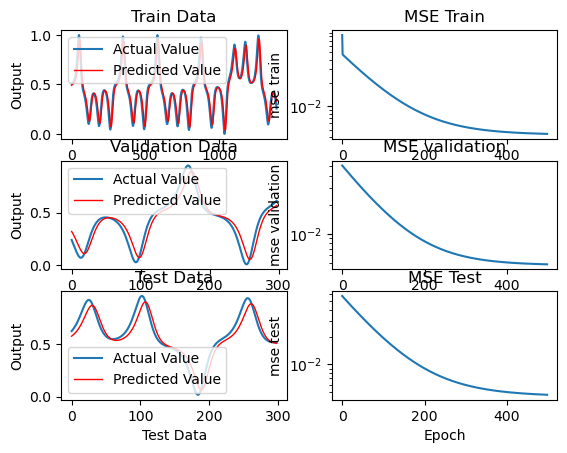

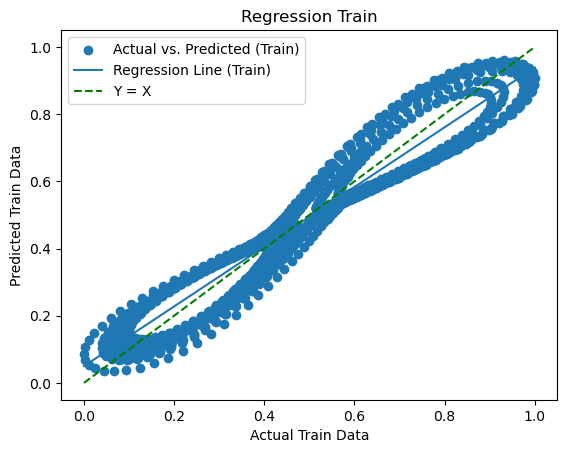

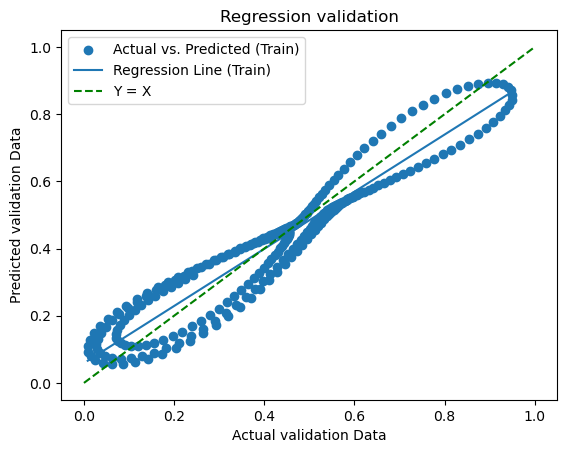

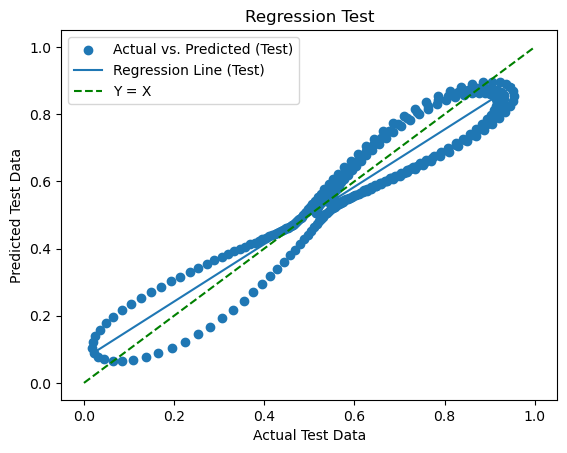

In [367]:
mse_val = np.zeros(epoch)
for t in range(epoch):
    error = np.zeros(num_train)
    error_square_train = np.zeros(num_train)
    for i in range(num_train):
        input = np.zeros((n1,n0)) + X_train[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        o3u = np.dot(w3u, o2)
        o3l = np.dot(w3l, o2)
        o3 = 0.5*o3u + 0.5*o3l
        output_data_train[i] = o3
        Y = Y_train[i]
        error[i] = Y - o3
        error_square_train[i] = np.sum(error[i]**2)
        gradw3u = -0.5*error[i]*o2
        w3u  -= eta*gradw3u
        gradw3l = -0.5*error[i]*o2
        w3l -=eta*gradw3l
    mse_train[t] = np.mean(error_square_train)
    
    error = np.zeros(num_validation)
    error_square_validation = np.zeros(num_validation)
    for i in range(num_validation):
        input = np.zeros((n1,n0)) + X_validation[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        o3u = np.dot(w3u, o2)
        o3l = np.dot(w3l, o2)
        o3 = 0.5*o3u + 0.5*o3l
        output_data_validation[i] = o3
        Y = Y_validation[i]
        error[i] = Y - o3
        error_square_validation[i] = np.sum(error[i]**2)
    mse_val[t] = np.mean(error_square_validation)

    error = np.zeros(num_test)
    error_square_test = np.zeros(num_test)
    for i in range(num_test):
        input = np.zeros((n1,n0)) + X_test[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        o3u = np.dot(w3u, o2)
        o3l = np.dot(w3l, o2)
        o3 = 0.5*o3u + 0.5*o3l
        output_data_test[i] = o3
        Y = Y_test[i]
        error[i] = Y - o3
        error_square_test[i] = np.sum(error[i]**2)
    mse_test[t] = np.mean(error_square_test)
    
    plt.subplot(3, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(Y_train, label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(3, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')
  
    #fit validation
    plt.subplot(3, 2, 3)
    plt.cla()  # Clear the previous plot
    plt.plot(Y_validation, label="Actual Value")
    plt.plot(output_data_validation, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Validation Data')
    plt.xlabel('Validation Data')
    plt.ylabel('Output')

    # The MSE validation data plot
    plt.subplot(3, 2, 4)
    plt.cla()
    plt.semilogy(mse_val[:t])
    plt.title('MSE validation')
    plt.xlabel('Epoch')
    plt.ylabel('mse validation')

    # The test data plot
    plt.subplot(3, 2, 5)
    plt.cla()
    plt.plot(Y_test, label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(3, 2, 6)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(Y_train, output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(Y_train, output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Validation Plot
plt.figure(4)
plt.scatter(Y_validation, output_data_validation, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(Y_validation, output_data_validation, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual validation Data')
plt.ylabel('Predicted validation Data')
plt.title('Regression validation')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(5)
plt.scatter(Y_test, output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(Y_test, output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()   
    

**Temperature Dataset**

In [1]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/HW3/regression/Temperature Dataset.xlsx")
data_T = df.to_numpy()

**Preparing Dataset**

In [3]:
data = data_T
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)
# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii]))/(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)

C:\Users\ISD\AppData\Local\Temp\ipykernel_11932\1017635923.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_11932\1017635923.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Define function**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Function to calculate the Gaussian RBF kernel
def rbf_kernel(x, center, sigma):
    net = np.linalg.norm(x - center)
    return np.exp(-net**2 / (2 * sigma**2))

# Function to initialize RBF neuron centers and sigmas
def initialize_parameters(X,num_neurons, number_feature):
    centers = np.zeros((num_neurons, number_feature))
    for i in range(number_feature):
        selected_indices = np.random.choice(X.shape[0], num_neurons, replace=False)
        centers[:, i] = X[selected_indices, i]
    sigma = (X.max() - X.min()) / math.sqrt(2 * num_neurons)
    sigmas = np.ones(num_neurons) * sigma  # Initialize sigmas for each neuron
    return centers, sigmas
def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

**Initialize RBF-GMDH-Rough**

In [69]:
num_data = data.shape[0]
percent_train = 0.70
percent_test = 0.15
percent_validation = 0.15

num_train = round(num_data * percent_train)
num_validation = round(num_data * percent_validation)
num_test = num_data - (num_train + num_validation)
n0 = data.shape[1]-1
n1 = 5
n2 = int(n1*(n1-1)/2)
n3 = 1
eta = 0.1
eta2 = 0.008
epoch = 150

a, b = -1, 1


X_train, Y_train = data[:num_train,:n0],data[:num_train,n0]
X_validation, Y_validation  =data[num_train:num_train + num_validation, :n0], data[num_train:num_train + num_validation, n0]
X_test , Y_test = data[num_train+ num_validation:,:n0],data[num_train+ num_validation:,n0]


output_data_train = np.zeros(num_train)
output_data_test = np.zeros(num_test)
output_data_validation = np.zeros(num_validation)

mse_train = np.zeros(epoch)
mse_test = np.zeros(epoch)
mse_validation = np.zeros(epoch)



**Define Layer**

In [72]:
np.random.seed(42)
c      = np.random.uniform( 0, 1, (n1,n0))
gradc  = np.zeros((n1, n0))
sigma  = np.random.uniform( 0, 2,n1)
net1   = np.zeros(n1)
o1     = np.zeros(n1)
w2     = np.random.uniform(-1, 1, (n2, 6 ))
o2     = np.zeros(n2)
w3u  = np.random.uniform( 0, 1, (n3, n2))
w3l = np.random.uniform(-1, 0, (n3, n2))
o3u  = np.zeros(n3)
o3l = np.zeros(n3)
o3= np.zeros(n3)

**Impelemention RBF-GMDH**

In [74]:
for t in range(epoch):
    error = np.zeros((num_train,n2))
    error_square_train = np.zeros(num_train)
    for i in range(num_train):
        input = np.zeros((n1,n0)) + X_train[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        Y = Y_train[i]
        error[i] =Y-o2 
        gradw20 = error[i]*-1*z[:,0]
        gradw21 = error[i]*-1*z[:,0]**2
        gradw22 = error[i]*-1*z[:,0]*z[:,1]
        gradw23 = error[i]*-1*z[:,1]
        gradw24 = error[i]*-1*z[:,1]** 2
        gradw25 = error[i]*-1
        grado1   = np.zeros(n1)
        np.add.at(grado1,idx.ravel(),np.concatenate((np.expand_dims(error[i]*-1*(w2[:,0]+2*w2[:,1]*z[:,0]+w2[:,2]*z[:,1]),1),np.expand_dims(error[i]*-1*(w2[:,4]+2*w2[:,3]*z[:,1]+w2[:,2]*z[:,0]),1)),axis = 1).ravel())
        gradc= np.expand_dims(grado1*(net1/np.power(sigma,2)),1)*o1
        gradsigma = grado1 * (np.power(net1,2)/np.power(sigma, 3))*o1
        w2[:,0]-= eta2*gradw20
        w2[:,1]-= eta2*gradw21
        w2[:,2]-= eta2*gradw22
        w2[:,3]-= eta2*gradw23
        w2[:,4]-= eta2*gradw24
        w2[:,5]-= eta2*gradw25
        c-= eta2*gradc
        sigma-=eta2*gradsigma
        error_square_train[i]  = np.sum(error[i] ** 2)
    mse_train[t] = np.mean(error_square_train)

    error_square_validation = np.zeros((num_validation,n2))
    error = np.zeros((num_validation,n2))
    for i in range(num_validation):
        input = np.zeros((n1,n0)) + X_train[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        Y = Y_train[i]
        error[i] =Y-o2 
        error_square_validation[i,:]  = (error[i]**2).T
    mse_validation_neuron= np.mean(error_square_validation, 0)
    mse_validation= np.mean(error_square_validation)
w2[np.flatnonzero(mse_validation < mse_validation_neuron), : ] = 0

**Imelemention RBF-GMDH-Rough**

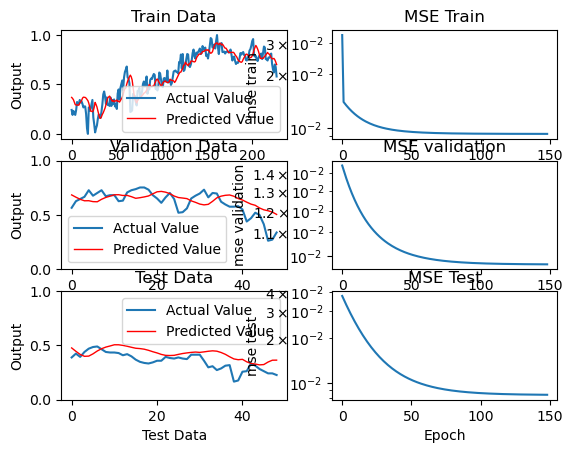

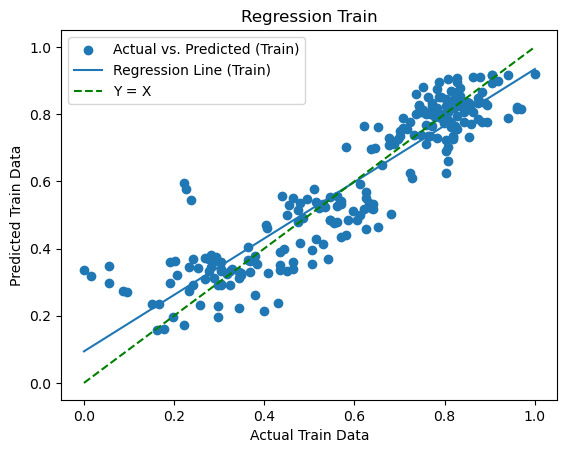

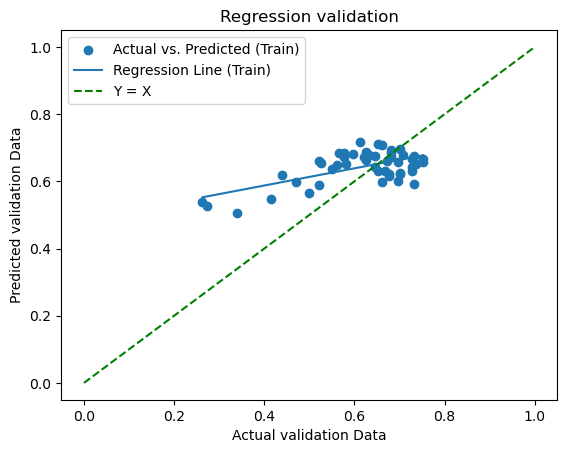

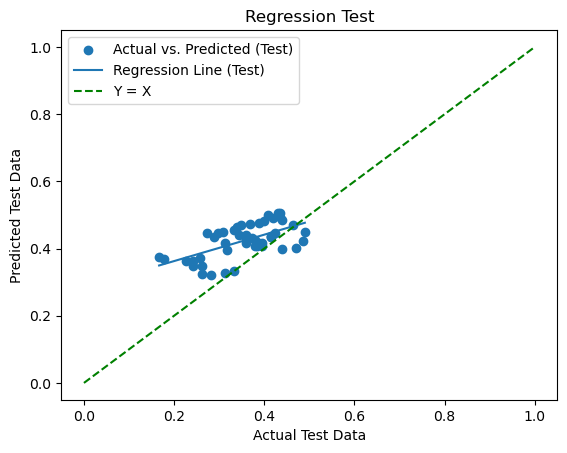

In [77]:
mse_val = np.zeros(epoch)
for t in range(epoch):
    error = np.zeros(num_train)
    error_square_train = np.zeros(num_train)
    for i in range(num_train):
        input = np.zeros((n1,n0)) + X_train[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        o3u = np.dot(w3u, o2)
        o3l = np.dot(w3l, o2)
        o3 = 0.5*o3u + 0.5*o3l
        output_data_train[i] = o3
        Y = Y_train[i]
        error[i] = Y - o3
        error_square_train[i] = np.sum(error[i]**2)
        gradw3u = -0.5*error[i]*o2
        w3u  -= eta*gradw3u
        gradw3l = -0.5*error[i]*o2
        w3l -=eta*gradw3l
    mse_train[t] = np.mean(error_square_train)
    
    error = np.zeros(num_validation)
    error_square_validation = np.zeros(num_validation)
    for i in range(num_validation):
        input = np.zeros((n1,n0)) + X_validation[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        o3u = np.dot(w3u, o2)
        o3l = np.dot(w3l, o2)
        o3 = 0.5*o3u + 0.5*o3l
        output_data_validation[i] = o3
        Y = Y_validation[i]
        error[i] = Y - o3
        error_square_validation[i] = np.sum(error[i]**2)
    mse_val[t] = np.mean(error_square_validation)

    error = np.zeros(num_test)
    error_square_test = np.zeros(num_test)
    for i in range(num_test):
        input = np.zeros((n1,n0)) + X_test[i, :]
        net1 = np.linalg.norm(input-c, 2, 1)
        o1 = np.exp(-0.5)*np.power(net1/sigma, 2)
        idx = np.array([(i,j) for i in range(len(o1)) for j in range(i+1, len(o1))])
        z = np.array([(o1[i],o1[j]) for i in range(len(o1)) for j in range(i+1, len(o1))])
        o2 =  w2[:,0]*z[:,0]+w2[:,1]*np.power(z[:,0],2)+w2[:,2]*z[:,0]*z[:,1]+w2[:,3]*z[:,1]+w2[:,4]*np.power(z[:,1],2)+w2[:,5]
        o3u = np.dot(w3u, o2)
        o3l = np.dot(w3l, o2)
        o3 = 0.5*o3u + 0.5*o3l
        output_data_test[i] = o3
        Y = Y_test[i]
        error[i] = Y - o3
        error_square_test[i] = np.sum(error[i]**2)
    mse_test[t] = np.mean(error_square_test)
    
    plt.subplot(3, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(Y_train, label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(3, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')
  
    #fit validation
    plt.subplot(3, 2, 3)
    plt.cla()  # Clear the previous plot
    plt.plot(Y_validation, label="Actual Value")
    plt.plot(output_data_validation, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Validation Data')
    plt.xlabel('Validation Data')
    plt.ylabel('Output')
    plt.ylim(0,1)
    # The MSE validation data plot
    plt.subplot(3, 2, 4)
    plt.cla()
    plt.semilogy(mse_val[:t])
    plt.title('MSE validation')
    plt.xlabel('Epoch')
    plt.ylabel('mse validation')

    # The test data plot
    plt.subplot(3, 2, 5)
    plt.cla()
    plt.plot(Y_test, label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')
    plt.ylim(0,1)

    # MSE test data plot
    plt.subplot(3, 2, 6)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(Y_train, output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(Y_train, output_data_train, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()

# Regression Validation Plot
plt.figure(4)
plt.scatter(Y_validation, output_data_validation, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(Y_validation, output_data_validation, 'Regression Line (Train)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual validation Data')
plt.ylabel('Predicted validation Data')
plt.title('Regression validation')
plt.legend()
plt.show()

# Regression Test Plot
plt.figure(5)
plt.scatter(Y_test, output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(Y_test, output_data_test, 'Regression Line (Test)')
plt.plot([min(data[:, 5]), max(data[:, 5])], [min(data[:, 5]), max(data[:, 5])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()   
    